<a href="https://colab.research.google.com/github/Mariehf64/fev23cda_french_industry/blob/EDA_Dominique/Exploration_Base_etablissements_par_tranche_effectifs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd  # appel des bibliohthéques
import numpy as np
import matplotlib.pyplot as plt
##ceci est un test###

In [155]:
# appel du fichier source  => base_etablissement_par_tranche_effectif.csv
source=pd.read_csv('/content/base_etablissement_par_tranche_effectif.csv')

# création d'une copie pour éviter toute corruption du fichier source
df=source.copy() 

In [156]:
# prémière visusalisation 
df.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [157]:
# premières analyses 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


**CHANGEMENT DE LA DTYPE DE LA VARIABLE REG**

la dtype de la variable REG doit être modifiée en str


In [158]:
# changement du Dtype de REG

df['REG']=df['REG'].astype('str')

**RAPPORT D'EXPLORATION**

In [159]:
#rappport d'exploration

rap=pd.DataFrame() #création du rapport
rap['Colonne']=df.columns  # création de la colonne 'Colonne'

rap['Dtype']=[df[i].dtype for i in df.columns ] # création de la colonne 'Dtype'

rap['T_NaN']=[(df[i].isna().sum()/df.shape[0]).round(1) for i in df.columns] # création de la colonne 'T_NaN' 

# création de la colonne max

max=[]
for i in df.columns :
  if df[i].dtype==object:
    max.append('nd')
  else :
    max.append(df[i].max())

rap['Max']=pd.DataFrame(max)

# création del a colonne min

min=[]
for i in df.columns :
  if df[i].dtype==object:
    min.append('nd')
  else :
    min.append(df[i].min())
rap['Min']=pd.DataFrame(min)

# création de la colonne description 

descript=['ID géographique de la ville',
          'nom de la ville',
          'numéro de région',
          'numéro de département',
          "nombre total d'entreprises dans la ville",
          "nombre d'entreprises de taille inconnue ou nulle dans la ville",
          "nombre d'entreprises de 1 à 5 employés dans la ville",
          "nombre d'entreprises de 6 à 9 employés dans la ville",
          "nombre d'entreprises de 10 à 19 employés dans la ville",
          "nombre d'entreprises de 20 à 49 employés dans la ville",
          "nombre d'entreprises de 50 à 99 employés dans la ville",
          "nombre d'entreprises de 100 à 199 employés dans la ville",
          "nombre d'entreprises de 200 à 499 employés dans la ville",
          "nombre d'entreprises de plus de 500 employés dans la ville"
          ]
rap['Description']=descript

# Nombre de valeurs pour les variables catégorielles
distrib=[]

for i in df.columns :
    if df[i].dtype==object :
      distrib.append(len(df[i].unique()))
    else :
      distrib.append('nd')

rap['Distribution']=distrib 

display(rap)

,Colonne,Dtype,T_NaN,Max,Min,Description,Distribution
0,CODGEO,object,0.0,nd,nd,ID géographique de la ville,36681
1,LIBGEO,object,0.0,nd,nd,nom de la ville,34142
2,REG,object,0.0,nd,nd,numéro de région,27
3,DEP,object,0.0,nd,nd,numéro de département,101
4,E14TST,int64,0.0,427385,0,nombre total d'entreprises dans la ville,nd
5,E14TS0ND,int64,0.0,316603,0,nombre d'entreprises de taille inconnue ou nul...,nd
6,E14TS1,int64,0.0,76368,0,nombre d'entreprises de 1 à 5 employés dans la...,nd
7,E14TS6,int64,0.0,14836,0,nombre d'entreprises de 6 à 9 employés dans la...,nd
8,E14TS10,int64,0.0,10829,0,nombre d'entreprises de 10 à 19 employés dans ...,nd
9,E14TS20,int64,0.0,5643,0,nombre d'entreprises de 20 à 49 employés dans ...,nd


**Concernant les NaN**

aucun NaN



**ANALYSE DES VARIABLES CATEGORIELLES**

In [160]:
# création du dataframe dédié
df_cat=df.select_dtypes(include='object')
df_cat.head()

,CODGEO,LIBGEO,REG,DEP
0,01001,L'Abergement-Clémenciat,82,01
1,01002,L'Abergement-de-Varey,82,01
2,01004,Ambérieu-en-Bugey,82,01
3,01005,Ambérieux-en-Dombes,82,01
4,01006,Ambléon,82,01


In [161]:
rap_cat=pd.DataFrame()
rap_cat['Colonne']=df_cat.columns

rap_cat['distribution']=list(df_cat.apply(lambda row : len(row.unique())))
rap_cat['NaN']=list(df_cat.apply(lambda row : row.isna().sum()))

display(rap_cat)

,Colonne,distribution,NaN
0,CODGEO,36681,0
1,LIBGEO,34142,0
2,REG,27,0
3,DEP,101,0


la distribution semble globalement cohérente
selon la direction générale de collectivités locales aux 1er janvier 2022.

il y aurait 34 955 communes
101 départements
18 régions

Cf. source

https://www.collectivites-locales.gouv.fr/files/Accueil/DESL/WEB-Chiffres-cle%CC%81s%20des%20CL%202022.pdf

**POINT SUR LA DISTRIBUTION REGION**

différence constatée entre la distibution (27) et le nombre de régions DGCL (18)
point à vérifier !!! 





**ENRICHIR LES VARIABLES CATEGORIELLES**


si nécessaire les informations sur le Code officiel géographique au 1er janvier 2022 est ici : https://www.insee.fr/fr/information/6051727

différents fichiers y sont proposés avec différents niveaux : commune, canton, départements, régions.

le fichier pour les régions est ici : https://www.insee.fr/fr/statistiques/fichier/6051727/region_2022.csv



In [18]:
# création du df régions à partir du Code officiel géographique au 1er janvier 2022
df_reg_source=pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6051727/region_2022.csv')
df_reg_source.head()

,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique,Martinique
2,3,97302,3,GUYANE,Guyane,Guyane
3,4,97411,0,LA REUNION,La Réunion,La Réunion
4,6,97608,0,MAYOTTE,Mayotte,Mayotte


In [76]:
# Création du df région | Deux variables sont conservés : REG et le LIBELLE   
df_reg=df_reg_source[['REG','LIBELLE']]


In [79]:
# vérification des entrées du df_reg
print(df_reg.LIBELLE.unique())
print (len(df_reg.LIBELLE.unique()))

print(df_reg.REG.unique())


['Guadeloupe' 'Martinique' 'Guyane' 'La Réunion' 'Mayotte' 'Île-de-France'
 'Centre-Val de Loire' 'Bourgogne-Franche-Comté' 'Normandie'
 'Hauts-de-France' 'Grand Est' 'Pays de la Loire' 'Bretagne'
 'Nouvelle-Aquitaine' 'Occitanie' 'Auvergne-Rhône-Alpes'
 "Provence-Alpes-Côte d'Azur" 'Corse']
18
[ 1  2  3  4  6 11 24 27 28 32 44 52 53 75 76 84 93 94]


In [89]:
# vérification du format du df_reg
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   REG      18 non-null     int64 
 1   LIBELLE  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


**ANALYSE DES VARIABLES CONTINUES**

In [162]:
df_cont=df.select_dtypes(include=['int64','float64'])
df_cont.head()


,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,25,22,1,2,0,0,0,0,0,0
1,10,9,1,0,0,0,0,0,0,0
2,996,577,272,63,46,24,9,3,2,0
3,99,73,20,3,1,2,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution des variables continues')

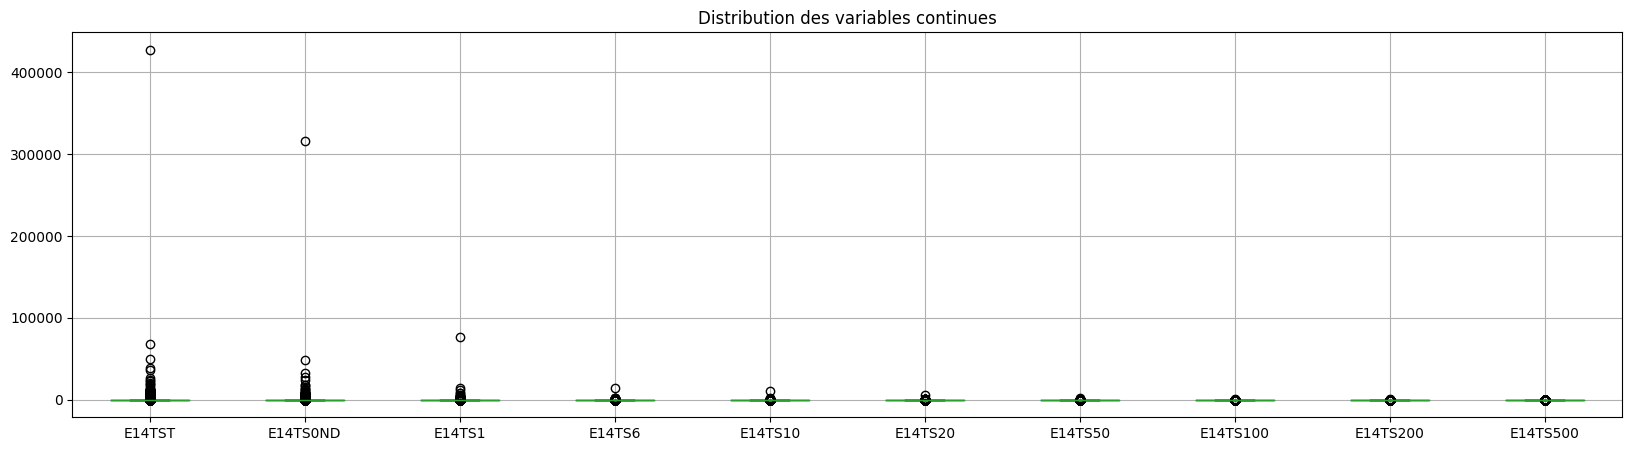

In [163]:
df_cont.boxplot(figsize=(20,5))
plt.title("Distribution des variables continues")       

Certaines valeurs posent problème notamment pour E14TST, E14TSOND, E14TS1,

**COMPARAISON ENTRE LES VARIABLES**

en théorie E14TST devrait être égale à la somme des autres variables

In [183]:
rap_df_cont=pd.DataFrame()
rap_df_cont['Colonne']=df_cont.columns
rap_df_cont['Somme']=list(df_cont.apply(lambda row : row.sum()))

somme_variables=Rap_df_cont.iloc[1:,1:2].sum().astype(int)

rap_df_cont['%']=list(df_cont.apply(lambda row : row.sum().astype(int)/4528492).round(2))

display(rap_df_cont)

,Colonne,Somme,%
0,E14TST,4528492,1.00
1,E14TS0ND,3064892,0.68
2,E14TS1,1001079,0.22
3,E14TS6,191495,0.04
4,E14TS10,139400,0.03
5,E14TS20,84236,0.02
6,E14TS50,27083,0.01
7,E14TS100,12194,0.00
8,E14TS200,6337,0.00
9,E14TS500,1776,0.00



*   La somme des variables hors E14TST est bien égal à E14TST 
*   Les entreprises E14TS0ND (nombre d'entreprises de taille inconnue ou nul...)	representent 68 % de l'ensemble des entreprises  ❗

